In [1]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

Create linear regression models to predict startup profit based on only 1 feature (R&D spend, Administration or Marketing spend)

In [2]:
from google.colab import files
fileNya = files.upload()

Saving 50_Startups.csv to 50_Startups (1).csv


In [3]:
dataset = pd.read_csv('50_Startups.csv')

ANALYZING THE DATA

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
dataset.shape

(50, 5)

In [9]:
dataset.info

<bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida

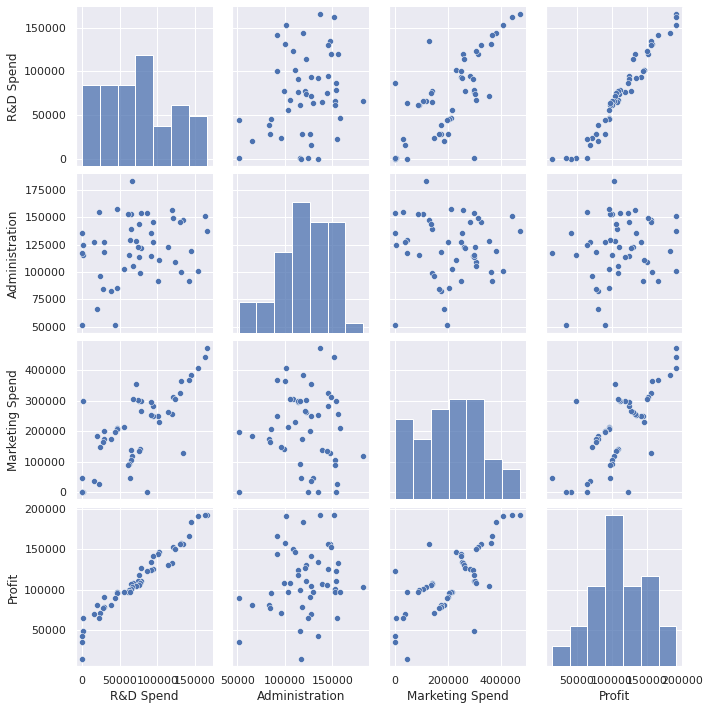

In [30]:
sns.pairplot(dataset)
plt.show()

SPLIT THE DATA

In [10]:
dataset.isnull().values.any()

False

In [11]:
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

In [12]:
dataset_copy = train_set.copy()

In [13]:
dataset_copy.shape

(40, 5)

In [14]:
dataset_copy.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
12,93863.75,127320.38,249839.44,Florida,141585.52
4,142107.34,91391.77,366168.42,Florida,166187.94
37,44069.95,51283.14,197029.42,California,89949.14
8,120542.52,148718.95,311613.29,New York,152211.77
3,144372.41,118671.85,383199.62,New York,182901.99


In [15]:
dataset_copy.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,40.000000,40.000000,40.000000,40.000000
mean,77687.845500,121142.922750,235747.081000,115651.720500
std,47897.502592,27454.110045,114863.931254,42019.018044
min,0.000000,51283.140000,0.000000,14681.400000
25%,40241.045000,102579.505000,160353.310000,90518.427500
50%,75124.210000,120134.700000,249791.995000,109543.120000
75%,120093.060000,145947.262500,304821.952500,147031.452500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [16]:
dataset_copy.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.156385,0.746371,0.973030
Administration,0.156385,1.000000,-0.101476,0.090235
Marketing Spend,0.746371,-0.101476,1.000000,0.773753
Profit,0.973030,0.090235,0.773753,1.000000


Visualisasi Data Asli (Scatter)

Create linear regression models to predict startup profit based on R&D Spend

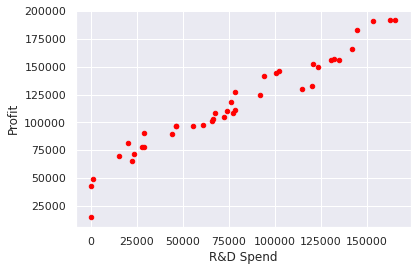

In [19]:
dataset_copy.plot.scatter(x='R&D Spend', y='Profit', color='red')

Visualisasi regresi pakai sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


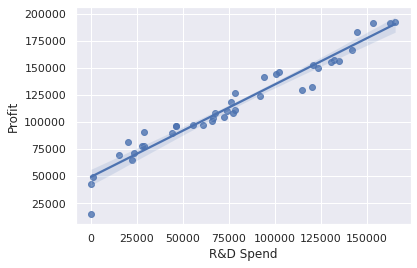

In [20]:
# Regression plot
sns.regplot('R&D Spend', # Horizontal axis
           'Profit', # Vertical axis
           data=dataset_copy)

PREDICT

In [21]:
test_set_full = test_set.copy()

test_set = test_set.drop(["Profit"], axis=1)

In [22]:
test_set.head()

,R&D Spend,Administration,Marketing Spend,State
13,91992.39,135495.07,252664.93,California
39,38558.51,82982.09,174999.30,California
30,61994.48,115641.28,91131.24,Florida
45,1000.23,124153.04,1903.93,New York
17,94657.16,145077.58,282574.31,New York


In [23]:
train_labels = train_set["Profit"]

In [24]:
train_labels.head()

12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
Name: Profit, dtype: float64

In [25]:
train_set_full = train_set.copy()

train_set = train_set.drop(["Profit"], axis=1)

In [26]:
train_set.head()

,R&D Spend,Administration,Marketing Spend,State
12,93863.75,127320.38,249839.44,Florida
4,142107.34,91391.77,366168.42,Florida
37,44069.95,51283.14,197029.42,California
8,120542.52,148718.95,311613.29,New York
3,144372.41,118671.85,383199.62,New York


Model persamaan linearnya(nilai m dan c)

In [32]:
# collecting x & y
X = dataset['R&D Spend'].values
Y = dataset['Profit'].values

# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [33]:
# total no.of input values
val_count = len(X)

# using the formula to calculate m & c
numer = 0
denom = 0
for i in range(val_count):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = 0.8542913709388088 
c = 49032.89914125214


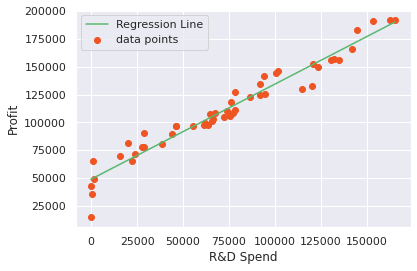

In [39]:
# plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# calculating line values x and y
x = np.linspace (min_x, max_x, 100)
y = c + m * x

plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X,Y,c='#ef5423', label='data points')

plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [35]:
# calculating R-squared value for measuring goodness of our model. 
ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals

for i in range(int(val_count)):
  y_pred = c + m * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.9465353160804393


In [36]:
# Linear regression implementation using sklearn

from sklearn.linear_model import LinearRegression

X = X.reshape(-1, 1)
reg = LinearRegression()
reg = reg.fit(X,Y)

Y_pred = reg.predict(X)
r2_square = reg.score(X, Y)

print (r2_square)

0.9465353160804393


Visualisasi Hasil prediksi(garisnya adalah garis prediksi, scatternya adalah data test)

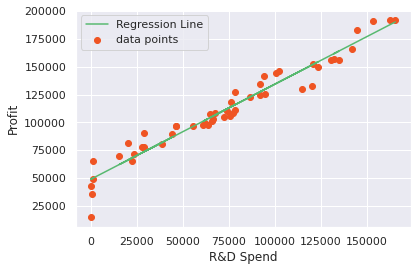

In [38]:
plt.plot(X, Y_pred, color='#58b970', label='Regression Line')
plt.scatter(X,Y,c='#ef5423', label='data points')

plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.show()